![Apolo 10](Nave_espacial.png)

In [73]:
import pandas as pd
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='white',offline=True) 

<style>
  input[type="checkbox"] {
    width: 20px;
    height: 20px;
    appearance: none;
    -webkit-appearance: none;
    -moz-appearance: none;
    border: 2px solid #3498db;
    border-radius: 5px;
    outline: none;
    transition: background-color 0.3s ease;
  }

  input[type="checkbox"]:checked {
    background-color: #3498db;
    border-color: #3498db; 
    
  }

  label {
    font-weight: bold;
    color: #333;
    margin-left: 5px;
  }
</style>

# Checklist task

<input type="checkbox" disabled> ¿Qué organización lanzó más misiones espaciales en un año determinado?

<input type="checkbox" disabled> ¿Cuántos lanzamientos se realizaron por año?

<input type="checkbox" disabled> ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

<input type="checkbox" disabled> ¿Cómo ha variado el número de lanzamientos de todas las Organizacioines a lo largo del tiempo

<input type="checkbox" disabled> ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?


> #### Previo a responder las preguntas es necesario realizar un análisis exploratorio y una limpieza de datos



In [74]:
df = pd.read_csv("mission_launches.csv")
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [76]:
porcentajes_nulos = df.isnull().sum()*100/df.shape[0]
porcentajes_nulos = round(porcentajes_nulos, 2)
porcentajes_nulos

Unnamed: 0.1       0.00
Unnamed: 0         0.00
Organisation       0.00
Location           0.00
Date               0.00
Detail             0.00
Rocket_Status      0.00
Price             77.71
Mission_Status     0.00
dtype: float64

In [77]:
df["Price"].fillna(0, inplace = True)

In [78]:
df.isnull().sum()

Unnamed: 0.1      0
Unnamed: 0        0
Organisation      0
Location          0
Date              0
Detail            0
Rocket_Status     0
Price             0
Mission_Status    0
dtype: int64

---

#### Con el análisis anterior ya no hay valores nulos en la columna Price
#### Sin embargo en la columna Location hay más de un registro. Esto no permite obtener la localización exacta
#### En la columna Rocket_Status el registro está unido al 'estado' por lo que hay que separarlo
#### Y en la columna Date no está en meses por lo tanto no se podría hacer un gráfico 

> #### Por lo tanto el archivo amerita limpieza de datos

In [79]:
df['Country'] = df["Location"].str.split(',').str[-1].str.strip() 
df['Country'].sample(10)

3032    Kazakhstan
651          India
2421        Russia
2106    Kazakhstan
3972           USA
3536        Russia
3673    Kazakhstan
776            USA
707            USA
2640        Russia
Name: Country, dtype: object

In [80]:
df["Date"].head(5)

0    Fri Aug 07, 2020 05:12 UTC
1    Thu Aug 06, 2020 04:01 UTC
2    Tue Aug 04, 2020 23:57 UTC
3    Thu Jul 30, 2020 21:25 UTC
4    Thu Jul 30, 2020 11:50 UTC
Name: Date, dtype: object

In [81]:
df["DateTime"] = df["Date"].str[:16]
df["DateTime"] = pd.to_datetime(df["DateTime"])
df["DateTime"]

0      2020-08-07
1      2020-08-06
2      2020-08-04
3      2020-07-30
4      2020-07-30
          ...    
4319   1958-02-05
4320   1958-02-01
4321   1957-12-06
4322   1957-11-03
4323   1957-10-04
Name: DateTime, Length: 4324, dtype: datetime64[ns]

In [82]:
df["Year"] = pd.to_datetime(df["DateTime"])
df["Year"] = df["Year"].dt.year

In [83]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,DateTime,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020-08-07,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020-08-06,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success,USA,2020-08-04,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020-07-30,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020-07-30,2020


In [84]:
columnas = []

In [85]:
df_clean1 = df.drop(df.columns[:2], axis=1)
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Location        4324 non-null   object        
 2   Date            4324 non-null   object        
 3   Detail          4324 non-null   object        
 4   Rocket_Status   4324 non-null   object        
 5   Price           4324 non-null   object        
 6   Mission_Status  4324 non-null   object        
 7   Country         4324 non-null   object        
 8   DateTime        4324 non-null   datetime64[ns]
 9   Year            4324 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(8)
memory usage: 321.1+ KB


In [86]:
df_clean2 = df_clean1.drop(df_clean1.columns[1:4], axis=1)
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4324 non-null   object        
 1   Rocket_Status   4324 non-null   object        
 2   Price           4324 non-null   object        
 3   Mission_Status  4324 non-null   object        
 4   Country         4324 non-null   object        
 5   DateTime        4324 non-null   datetime64[ns]
 6   Year            4324 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(5)
memory usage: 219.7+ KB


In [87]:
df_clean3 = df_clean2.drop(df_clean2.columns[-2], axis=1)
df_clean3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Rocket_Status   4324 non-null   object
 2   Price           4324 non-null   object
 3   Mission_Status  4324 non-null   object
 4   Country         4324 non-null   object
 5   Year            4324 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 185.9+ KB


In [88]:
df_clean4 = df_clean3.drop(df_clean3.columns[1], axis=1)
df_clean4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Price           4324 non-null   object
 2   Mission_Status  4324 non-null   object
 3   Country         4324 non-null   object
 4   Year            4324 non-null   int32 
dtypes: int32(1), object(4)
memory usage: 152.1+ KB


In [89]:
df_clean4["Price"] = pd.to_numeric(df_clean4["Price"], errors='coerce')

df_clean4["Price"] = df_clean4["Price"].fillna(0).astype(int)

df_clean4["Price"]


0        50
1        29
2         0
3        65
4       145
       ... 
4319      0
4320      0
4321      0
4322      0
4323      0
Name: Price, Length: 4324, dtype: int64

In [95]:
df_clean4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Price           4324 non-null   int64 
 2   Mission_Status  4324 non-null   object
 3   Country         4324 non-null   object
 4   Year            4324 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 152.1+ KB


## Datos limpios
#### A patir de ahora se puede obtener los resultados

<style>
  input[type="checkbox"] {
    width: 20px;
    height: 20px;
    appearance: none;
    -webkit-appearance: none;
    -moz-appearance: none;
    border: 2px solid #3498db;
    border-radius: 5px;
    outline: none;
    transition: background-color 0.3s ease;
  }

  input[type="checkbox"]:checked {
    background-color: #3498db;
    border-color: #3498db; 
    
  }

  label {
    font-weight: bold;
    color: #333;
    margin-left: 5px;
  }
</style>

# Checklist task

<input type="checkbox" disabled checked> ¿Qué organización lanzó más misiones espaciales en un año determinado?

<input type="checkbox" disabled> ¿Cuántos lanzamientos se realizaron por año?

<input type="checkbox" disabled> ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

<input type="checkbox" disabled> ¿Cómo ha variado el número de lanzamientos de todas las Organizacioines a lo largo del tiempo

<input type="checkbox" disabled> ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?


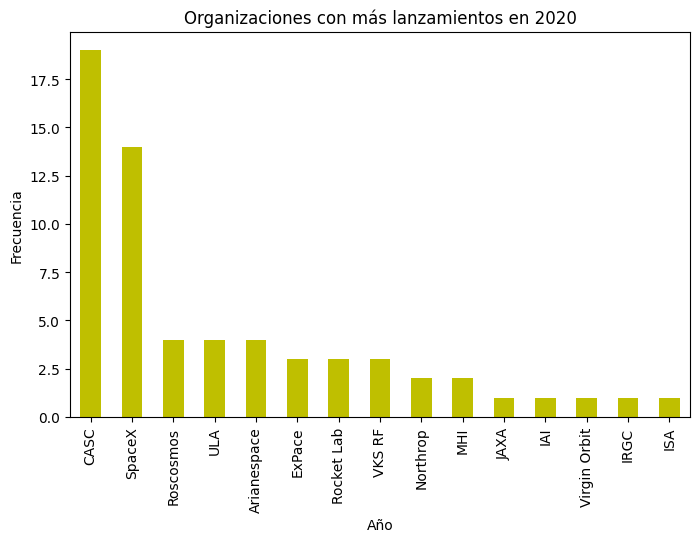

In [90]:
df_2020 = df_clean4[df_clean4["Year"] == 2020]

empleados_counts = df_2020["Organisation"].value_counts()

plt.figure(figsize=(8, 5))
empleados_counts.plot(kind='bar', color = "y")
plt.title("Organizaciones con más lanzamientos en 2020")
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.show()

<style>
  input[type="checkbox"] {
    width: 20px;
    height: 20px;
    appearance: none;
    -webkit-appearance: none;
    -moz-appearance: none;
    border: 2px solid #3498db;
    border-radius: 5px;
    outline: none;
    transition: background-color 0.3s ease;
  }

  input[type="checkbox"]:checked {
    background-color: #3498db;
    border-color: #3498db; 
    
  }

  label {
    font-weight: bold;
    color: #333;
    margin-left: 5px;
  }
</style>

# Checklist task

<input type="checkbox" disabled checked> ¿Qué organización lanzó más misiones espaciales en un año determinado?

<input type="checkbox" disabled checked> ¿Cuántos lanzamientos se realizaron por año?

<input type="checkbox" disabled> ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

<input type="checkbox" disabled> ¿Cómo ha variado el número de lanzamientos de todas las Organizacioines a lo largo del tiempo

<input type="checkbox" disabled> ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?




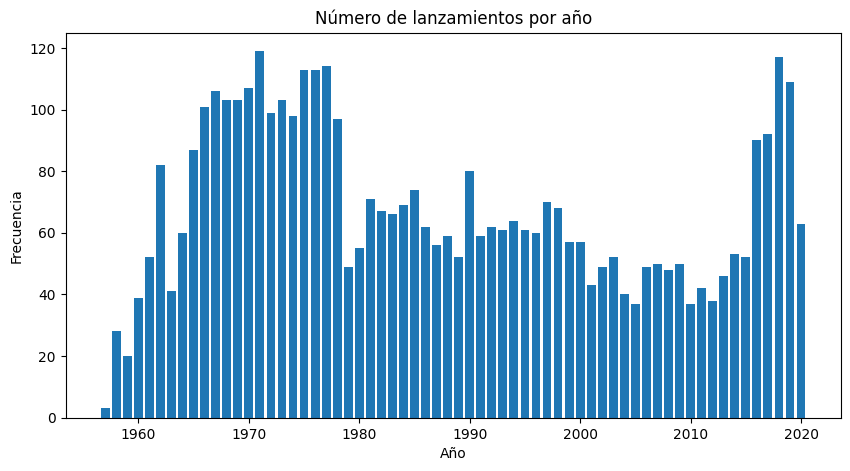

In [91]:
plt.figure(figsize=(10, 5))
numero_lanzamientos = df_clean4["Year"].value_counts()
plt.bar(numero_lanzamientos.index, numero_lanzamientos.values)
plt.xlabel("Año")
plt.ylabel("Frecuencia")
plt.title("Número de lanzamientos por año")
plt.show()

In [92]:
numero_lanzamientos = df_clean4["Year"].value_counts()
numero_lanzamientos


Year
1971    119
2018    117
1977    114
1975    113
1976    113
       ... 
2010     37
2005     37
1958     28
1959     20
1957      3
Name: count, Length: 64, dtype: int64

<style>
  input[type="checkbox"] {
    width: 20px;
    height: 20px;
    appearance: none;
    -webkit-appearance: none;
    -moz-appearance: none;
    border: 2px solid #3498db;
    border-radius: 5px;
    outline: none;
    transition: background-color 0.3s ease;
  }

  input[type="checkbox"]:checked {
    background-color: #3498db;
    border-color: #3498db; 
    
  }

  label {
    font-weight: bold;
    color: #333;
    margin-left: 5px;
  }
</style>

# Checklist task

<input type="checkbox" disabled checked> ¿Qué organización lanzó más misiones espaciales en un año determinado?

<input type="checkbox" disabled checked> ¿Cuántos lanzamientos se realizaron por año?

<input type="checkbox" disabled checked> ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

<input type="checkbox" disabled> ¿Cómo ha variado el número de lanzamientos de todas las Organizacioines a lo largo del tiempo

<input type="checkbox" disabled> ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

In [96]:
df_clean4[["Year", "Price"]].sample(10)

,Year,Price
2016,1987,0
319,2017,30
206,2018,153
3633,1968,0
798,2008,40
4191,1961,0
3903,1966,0
1764,1991,0
2190,1984,0
696,2011,0


#### Es necesario considerar que no se conoce el preio para todas las organizaciones

Text(0.5, 1.0, 'Precio vs Año')

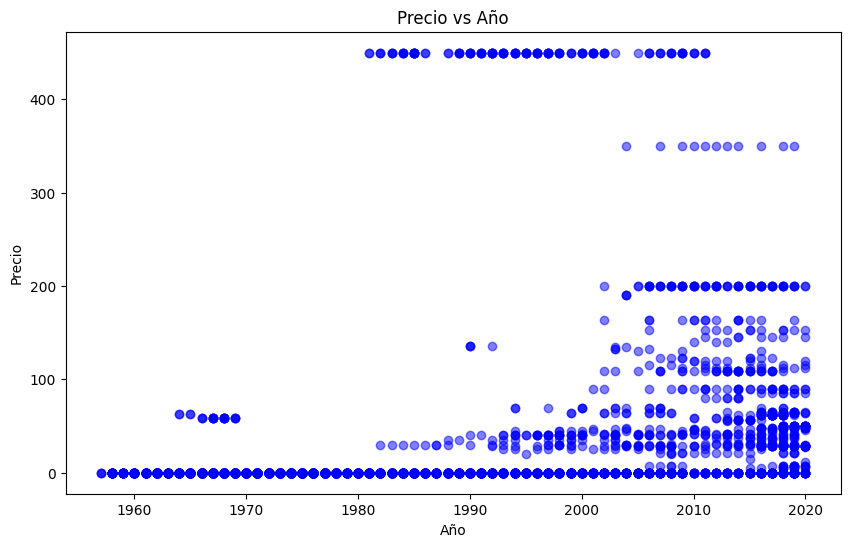

In [98]:
df_clean4["Price"] = pd.to_numeric(df_clean4["Price"], errors='coerce').fillna(0).astype(int)

plt.figure(figsize=(10, 6))
plt.scatter(df_clean4["Year"], df_clean4["Price"], alpha=0.5, color='blue')

plt.xlabel("Año")
plt.ylabel("Precio")
plt.title("Precio vs Año")

<style>
  input[type="checkbox"] {
    width: 20px;
    height: 20px;
    appearance: none;
    -webkit-appearance: none;
    -moz-appearance: none;
    border: 2px solid #3498db;
    border-radius: 5px;
    outline: none;
    transition: background-color 0.3s ease;
  }

  input[type="checkbox"]:checked {
    background-color: #3498db;
    border-color: #3498db; 
    
  }

  label {
    font-weight: bold;
    color: #333;
    margin-left: 5px;
  }
</style>

# Checklist task

<input type="checkbox" disabled checked> ¿Qué organización lanzó más misiones espaciales en un año determinado?

<input type="checkbox" disabled checked> ¿Cuántos lanzamientos se realizaron por año?

<input type="checkbox" disabled checked> ¿Cómo ha variado el costo de una misión espacial a lo largo del tiempo?

<input type="checkbox" disabled checked> ¿Cómo ha variado el número de lanzamientos de todas las Organizacioines a lo largo del tiempo

<input type="checkbox" disabled> ¿Se han vuelto más seguras las misiones espaciales o las posibilidades de fracaso se han mantenido sin cambios?

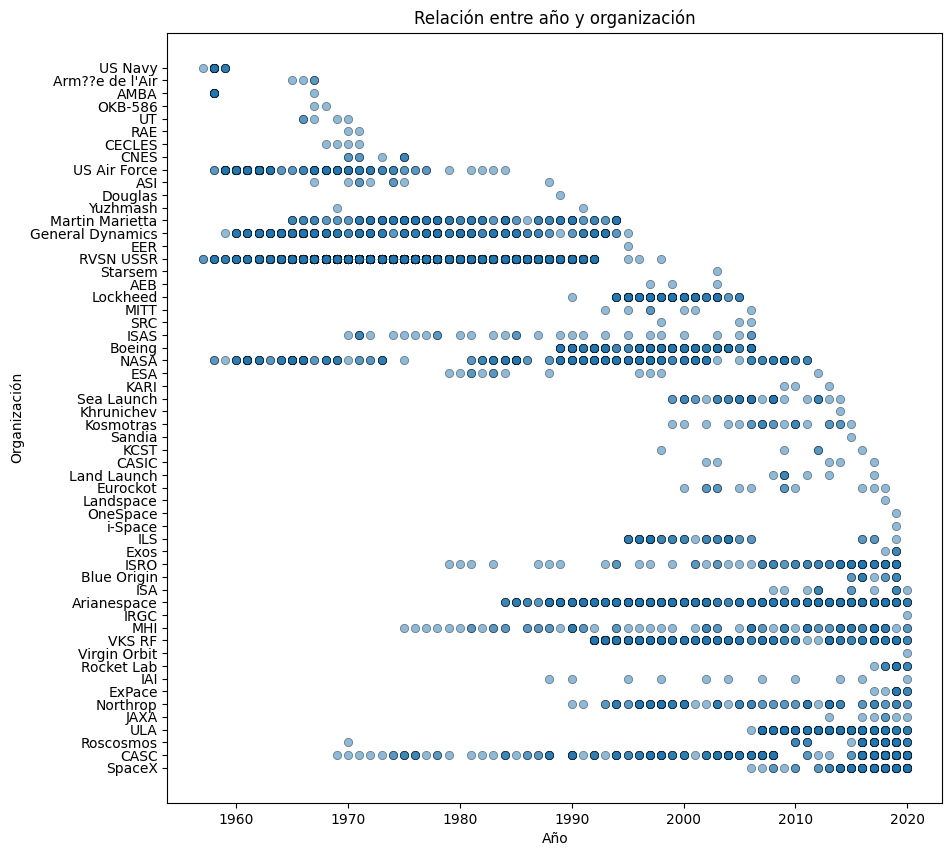

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(df_clean4["Year"], df_clean4["Organisation"], alpha=0.5, edgecolors="k", linewidth=0.5)

plt.xlabel("Año")
plt.ylabel("Organización")
plt.title("Relación entre año y organización")

plt.show()